<a href="https://colab.research.google.com/github/jmk9/try/blob/main/mnist_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
#image의 scale을 (0,1)로 맞추기 위함. color의 scale이 0~255. 숫자가 커질 수록 밝아짐
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
import numpy as np

In [ ]:
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

In [ ]:
print('train image shape :', x_train.shape)
print('test image shape :', x_test.shape)

train image shape : (60000, 28, 28)
test image shape : (10000, 28, 28)


In [ ]:
# train_data, test_data = mnist.load_data()
# train_img, train_label = train_data
# test_img, test_label = test_data

In [ ]:
import matplotlib.pyplot as plt
import math

In [ ]:
cnt = 8
img_cnt = math.ceil(math.sqrt(cnt)) #sqrt는 제곱근, ceil은 올림
img_cnt

3

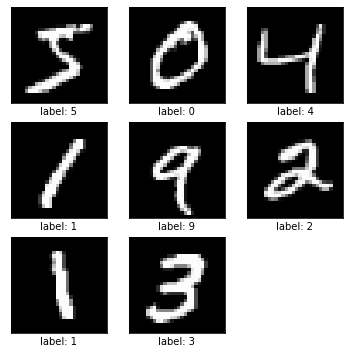

In [ ]:
cnt = 8
csqr = math.ceil(math.sqrt(cnt))

plt.figure(figsize=(2*csqr, 2*csqr)) #이미지 크기 설정. 3x3 사이즈
for i in range(cnt):
  plt.subplot(csqr, csqr, i+1) #전체 틀과 몇 번째에 표시하는지 설정. 3x3 사이즈에 1~9번째 이미지 표시
  plt.xticks([]) #눈금선 설정. 빈 리스트를 넣음으로써 눈금선 제거
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.gray)
  plt.xlabel('label: {}'.format(y_train[i]))
plt.show()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
def show_sample(img, label, cnt):
  csqr = math.ceil(math.sqrt(cnt))

  plt.figure(figsize=(2*csqr, 2*csqr)) #이미지 크기 설정. 3x3 사이즈
  for i in range(cnt):
    plt.subplot(csqr, csqr, i+1) #전체 틀과 몇 번째에 표시하는지 설정. 3x3 사이즈에 1~9번째 이미지 표시
    plt.xticks([]) #눈금선 설정. 빈 리스트를 넣음으로써 눈금선 제거
    plt.yticks([])
    plt.imshow(img[i], cmap=plt.cm.gray)
    plt.xlabel('label: {}'.format(label[i]))
  plt.show()

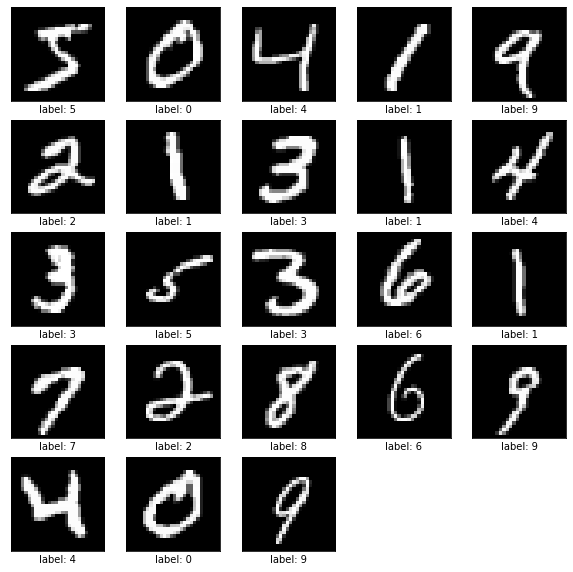

In [ ]:
show_sample(x_train, y_train, 23)

In [ ]:
x_train = np.expand_dims(x_train, -1) #model layer에 input할 때 스케일이 (n, n, n) 형태가 되어야 하므로 scale을 확장해줌.
x_test = np.expand_dims(x_test, -1)
print('train image shape :', x_train.shape)
print('test image shape :', x_test.shape)

train image shape : (60000, 28, 28, 1)
test image shape : (10000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train) #one-hot incoding을 통해 (1, 2)를 ([0,1,0], [0,0,1]) 형태로 컴퓨터가 이해하기 쉽게 변환
y_test = keras.utils.to_categorical(y_test)

In [ ]:
input_size = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(input_size)

(28, 28, 1)


In [ ]:
from keras import activations

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=input_size),
     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
     keras.layers.MaxPooling2D(pool_size=(2,2)),
     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
     keras.layers.MaxPooling2D(pool_size=(2,2)),
     keras.layers.Flatten(),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epoch = 10

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 43s 100ms/step - loss: 0.3790 - accuracy: 0.8856 - val_loss: 0.0833 - val_accuracy: 0.9763
Epoch 2/10
422/422 [==============================] - 43s 102ms/step - loss: 0.1157 - accuracy: 0.9651 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 3/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0853 - accuracy: 0.9741 - val_loss: 0.0489 - val_accuracy: 0.9868
Epoch 4/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.0449 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 43s 101ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 6/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0412 - val_accuracy: 0.9885
Epoch 7/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.0355 - val_accur

In [ ]:
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, '-', label='Training acc')
    plt.plot(epochs, val_acc, '-', label='Validation acc')
    plt.legend()

    plt.subplot(122)
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, '-', label='Validation loss')
    plt.legend()

    plt.show()

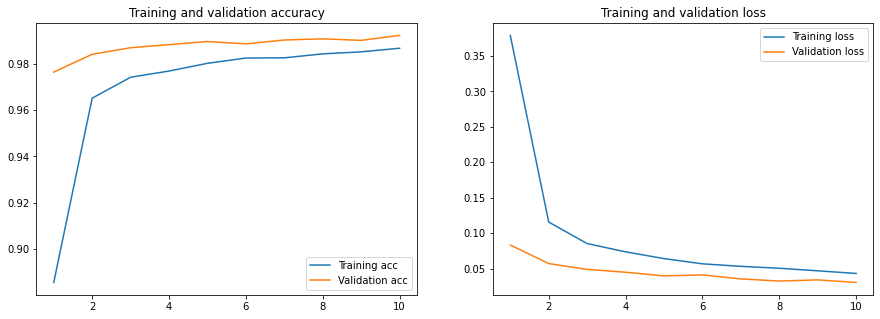

In [ ]:
plot_learning_curve(model_history)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *

In [ ]:
model = input = Input((28, 28))

dense1 = Dense(128, activation='relu')(input)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
dense4 = Dense(16, activation='relu')(dense3)
dense5 = Dense(8, activation='relu')(dense4)

SyntaxError: ignored